In [61]:
from plotnine import *
import pandas as pd
import numpy as np

In [62]:
time = "2024-02-14_14:49" # classifier_reg
time = "2024-02-28_09:51" # classifier_reg

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
# use log10 transformation on df['Actual'] and df['Predicted']
df['Actual'] = df['Actual'].apply(lambda x: np.log10(x + 1))
df['Predicted'] = df['Predicted'].apply(lambda x: np.log10(x + 1))

df['count'] = df.groupby(['Actual', 'Predicted', 'FoldID',  
                          'Dataset', "Algorithm"])['Predicted'].transform('count')
# df = df[(df["Algorithm"] == "Featureless") & (df["Dataset"] == "ioral") & (df["Index of Predicted Column"] == 36)]
# df = df[ (df["Dataset"] == "ioral") & (df["Index of Predicted Column"] == 36)]
# df = df[(df["Index of Predicted Column"] == 36)]

df

,Actual,Predicted,FoldID,Dataset,Index of Predicted Column,Predicted Column Name,Algorithm,count
0,0.456815,0.341248,0,ioral,36,Treponema,Featureless,1.0
1,0.000000,0.341248,0,ioral,36,Treponema,Featureless,5.0
2,0.506748,0.341248,0,ioral,36,Treponema,Featureless,1.0
3,0.407104,0.341248,0,ioral,36,Treponema,Featureless,1.0
4,0.451415,0.341248,0,ioral,36,Treponema,Featureless,1.0
...,...,...,...,...,...,...,...,...
127600,0.000000,0.000000,2,amgut1,108,X544358,LogisticRegLassoCV,1706.0
127601,0.000000,0.000000,2,amgut1,108,X544358,LogisticRegLassoCV,1706.0
127602,0.000000,0.378625,2,amgut1,108,X544358,LogisticRegLassoCV,1.0
127603,0.000000,0.000000,2,amgut1,108,X544358,LogisticRegLassoCV,1706.0


In [ ]:
df

In [ ]:
df

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/scales/scale.py:726: RuntimeWarning: divide by zero encountered in log10
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/scales/scale.py:726: RuntimeWarning: invalid value encountered in log10
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_tile : Removed 1374 rows containing missing values.


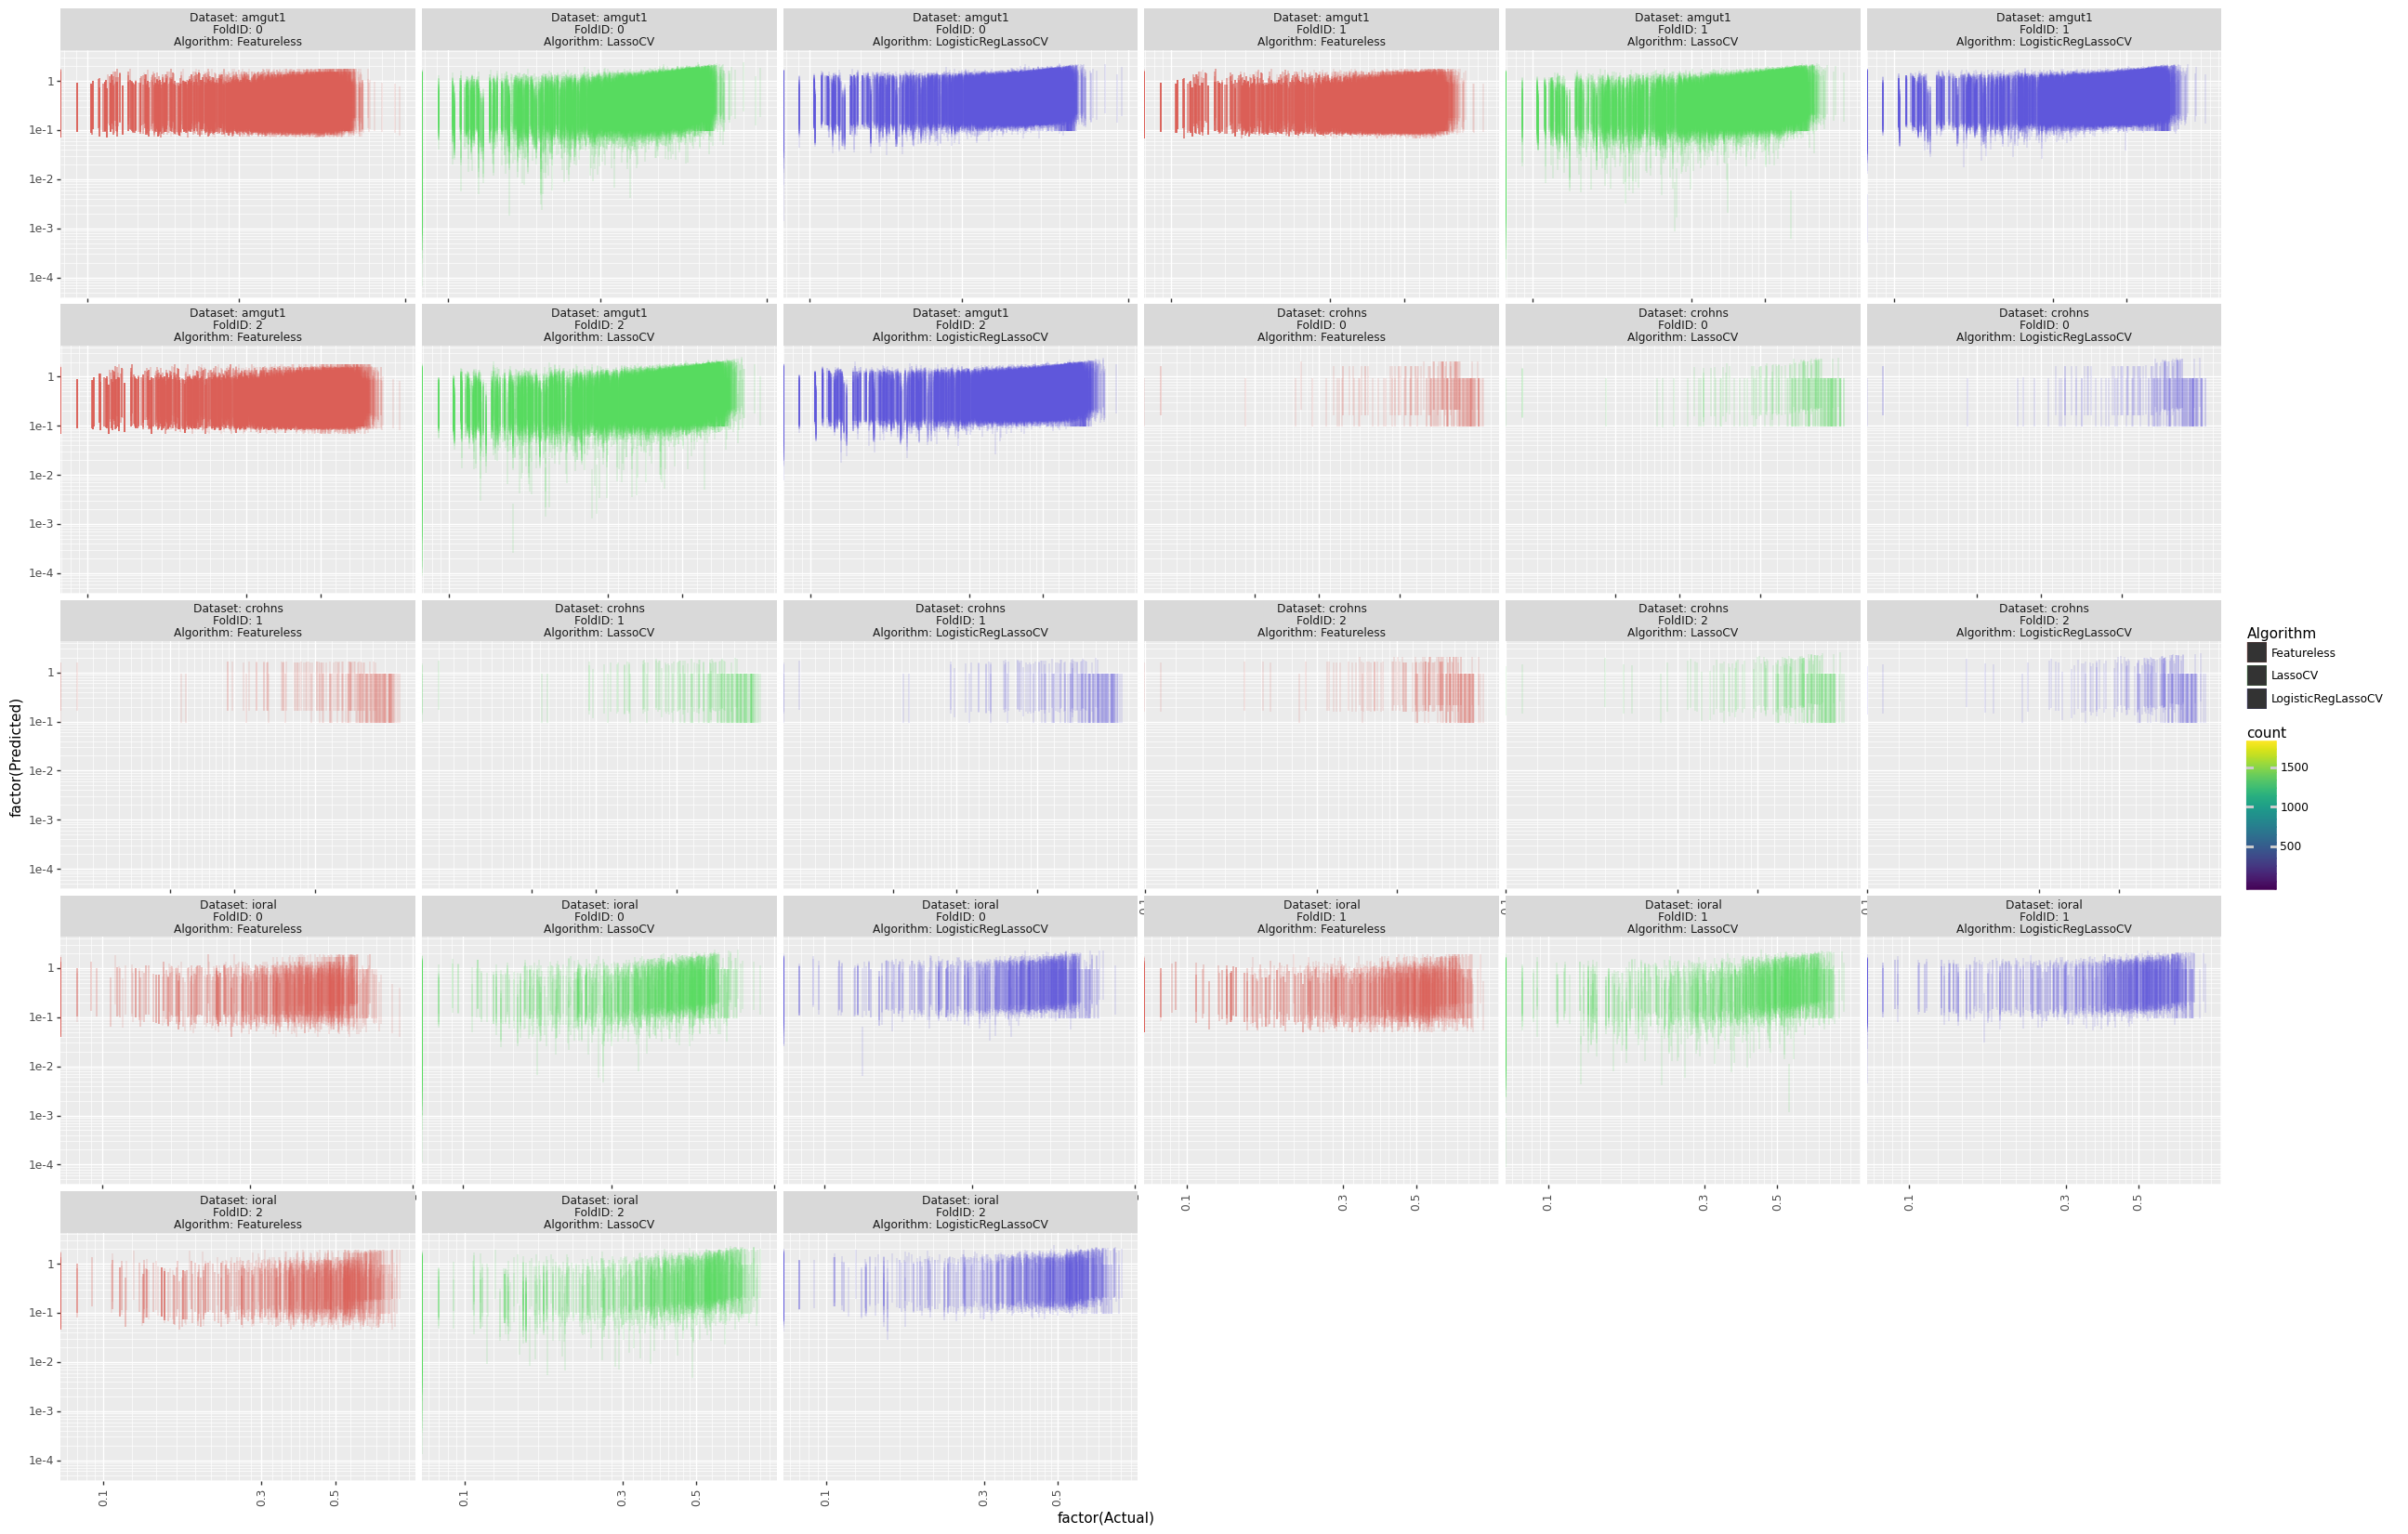

In [64]:
p = ggplot(df)
p = p + geom_tile(aes(x="factor(Actual)", y="factor(Predicted)", color="Algorithm", fill="count" ))
p = p + facet_wrap("~Dataset + FoldID + Algorithm", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 20))
p = p + scale_x_log10()
p = p + scale_y_log10()
print(p)

In [ ]:
df

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 1374 rows containing missing values.


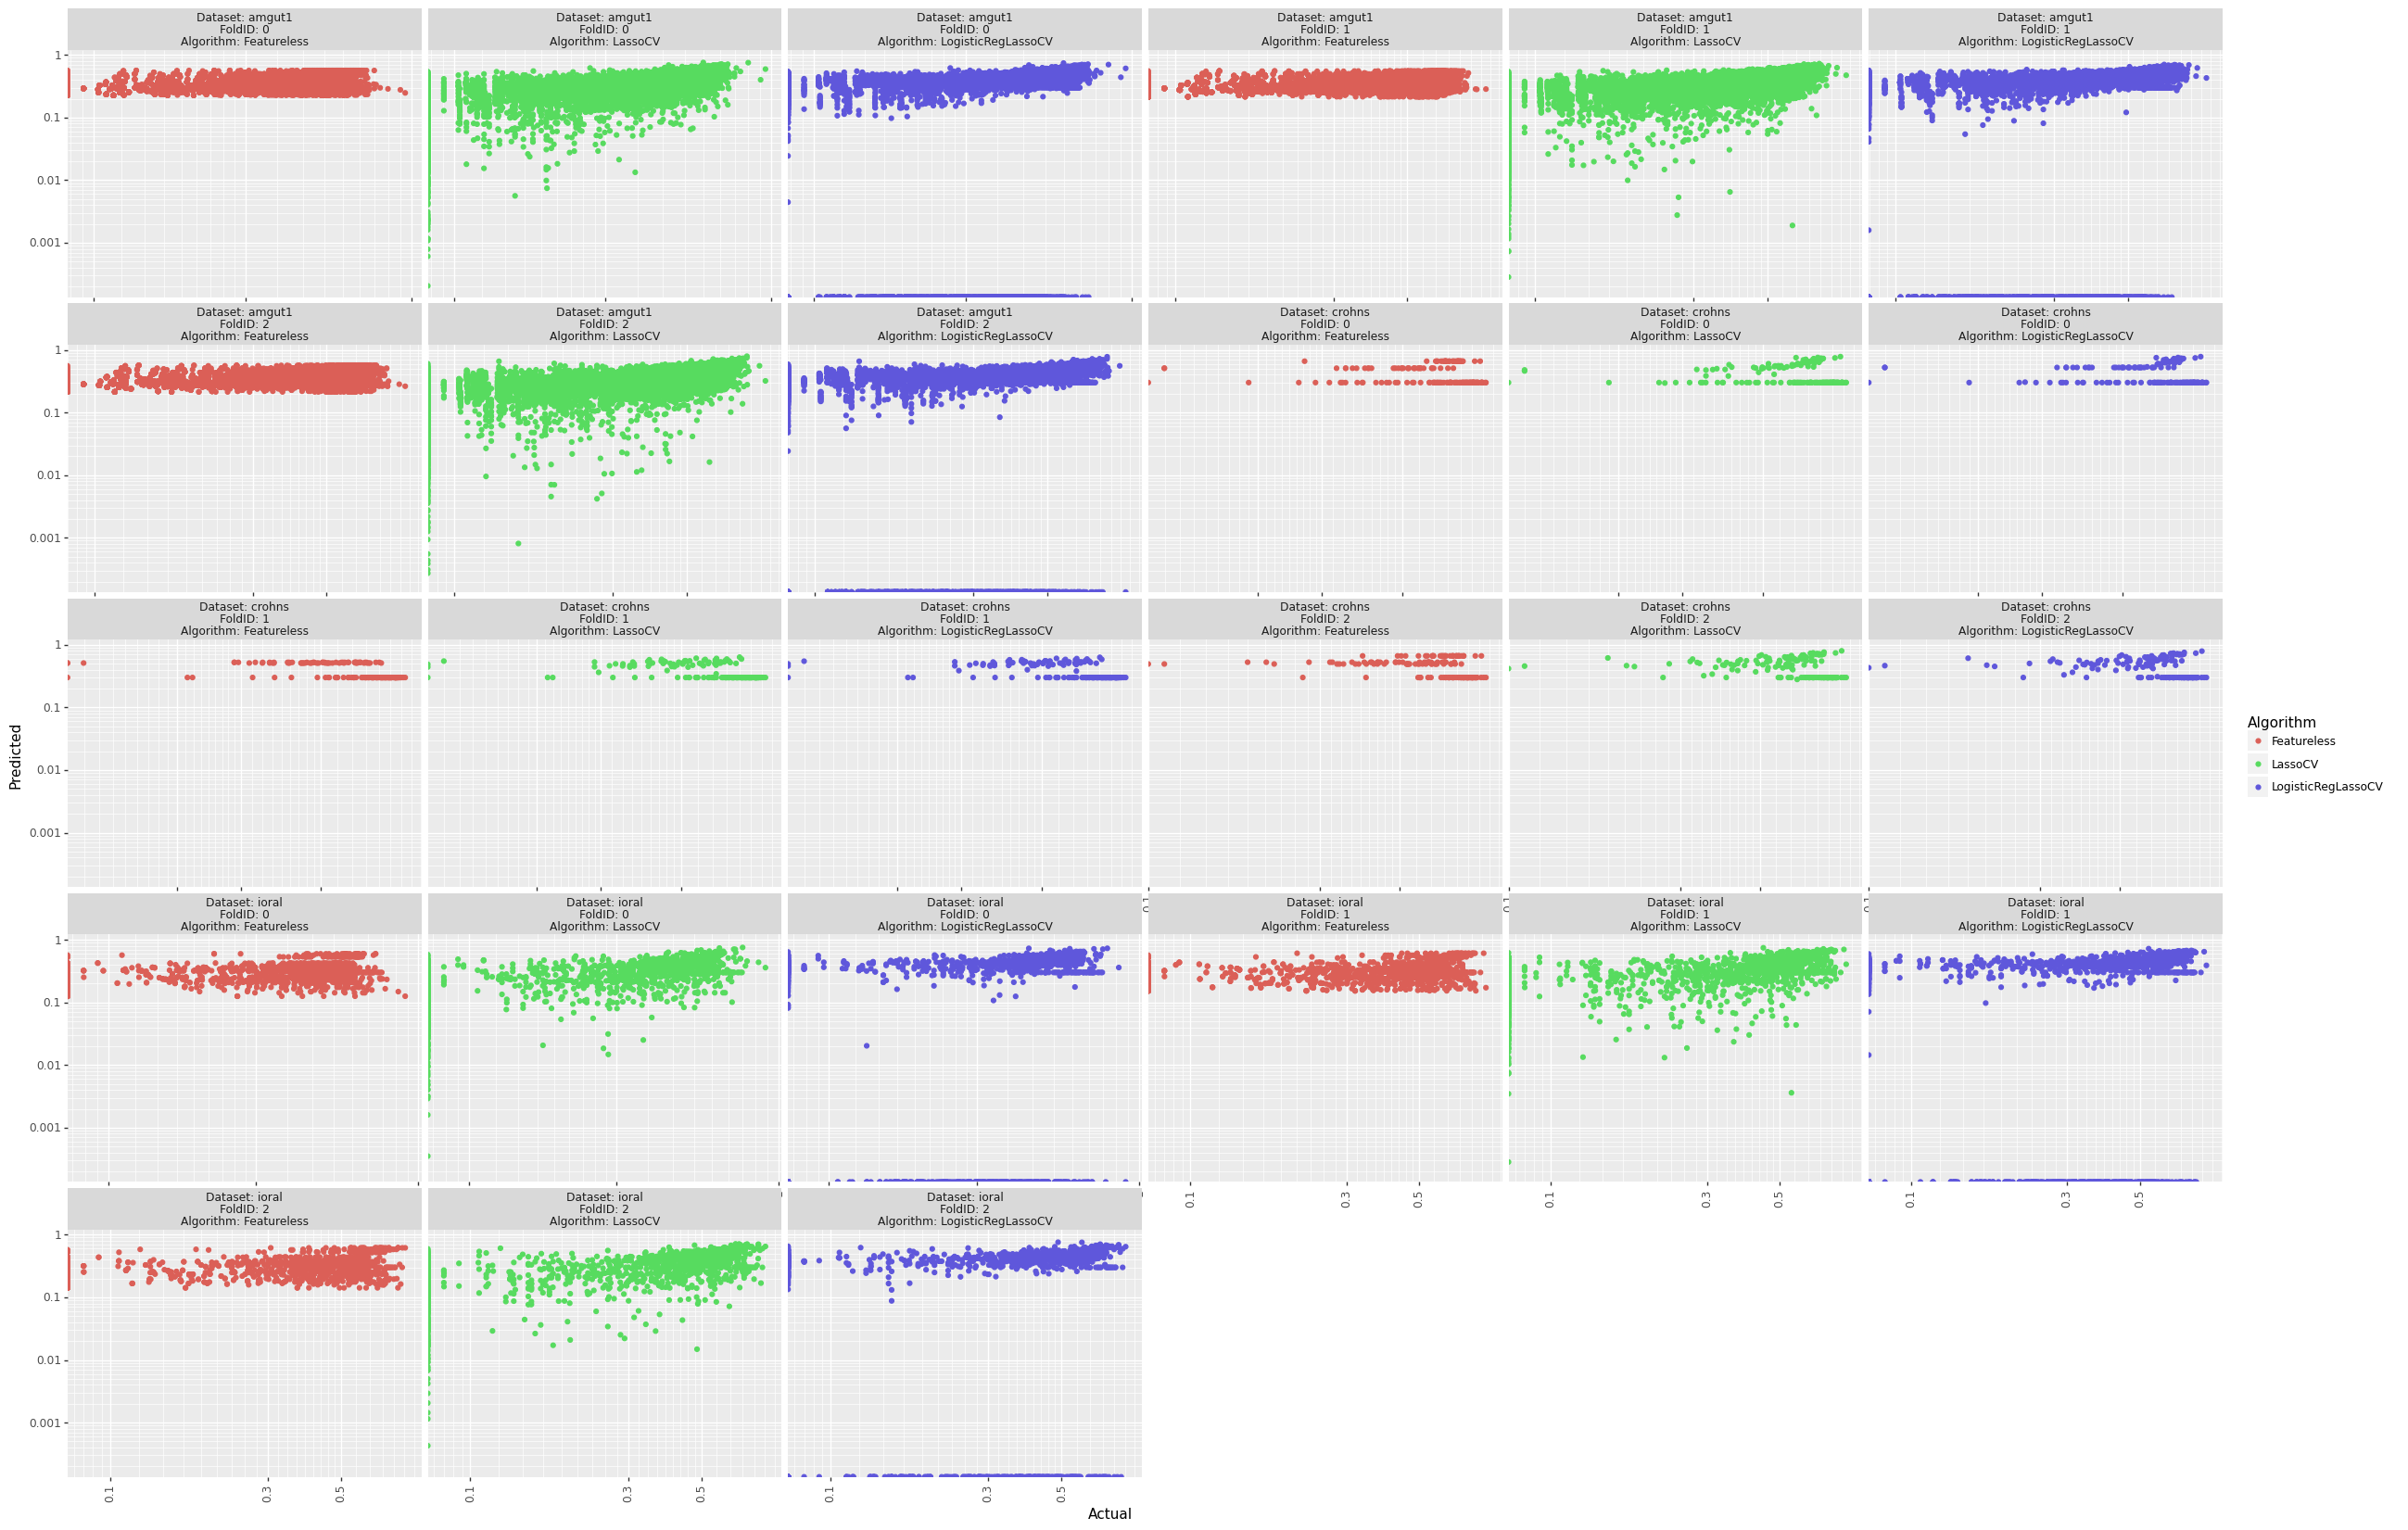

In [67]:
p = ggplot(df)
p = p + geom_point(aes(x="Actual", y="Predicted", color="Algorithm"))
p = p + facet_wrap("~Dataset + FoldID + Algorithm", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 20))
p = p + scale_x_log10()
p = p + scale_y_log10()
print(p)